<a href="https://colab.research.google.com/github/Arwa008/Cybersecurity/blob/main/FS_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import chi2
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read Train and Test dataset
data = pd.read_csv("KDDTrain.txt")
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [3]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
data.columns = columns
display(data.head())
print(data.shape)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


(125972, 43)


In [4]:
# put labels
data.loc[data['outcome'] == "normal", "outcome"] = 'normal'
data.loc[data['outcome'] != 'normal', "outcome"] = 'attack'

In [5]:
data['outcome'].value_counts()

normal    67342
attack    58630
Name: outcome, dtype: int64

# Preprocessing

## 1- Split and Encode data

In [6]:
from sklearn.preprocessing import LabelEncoder

# Split to data and target
X = data.drop("outcome", axis=1)
y = data["outcome"]

# Enode Target
le = LabelEncoder()
y = le.fit_transform(y)

# Check categorical features
Cate_Features=X.select_dtypes(include=['object']).columns.tolist()
print(Cate_Features)

# Enode Cate_Features
enc_protocol = pd.get_dummies(data["protocol_type"], prefix="protocol_")
enc_service = pd.get_dummies(data["service"], prefix="service_")
enc_flag = pd.get_dummies(data["flag"], prefix="flag_")
X = pd.concat([X, enc_protocol, enc_service, enc_flag], axis=1)
X.drop("protocol_type", axis=1, inplace=True)
X.drop("service", axis=1, inplace=True)
X.drop("flag", axis=1, inplace=True)

#Display encoded dataframes
y1=pd.DataFrame(y)
y1.columns=['outcome']
display(X.head())
print(X.shape)
display(y1.head())
print(y1.shape)


['protocol_type', 'service', 'flag']


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol__icmp,protocol__tcp,protocol__udp,service__IRC,service__X11,service__Z39_50,service__aol,service__auth,service__bgp,service__courier,service__csnet_ns,service__ctf,service__daytime,service__discard,service__domain,service__domain_u,service__echo,service__eco_i,service__ecr_i,service__efs,service__exec,service__finger,service__ftp,service__ftp_data,service__gopher,service__harvest,service__hostnames,service__http,service__http_2784,service__http_443,service__http_8001,service__imap4,service__iso_tsap,service__klogin,service__kshell,service__ldap,service__link,service__login,service__mtp,service__name,service__netbios_dgm,service__netbios_ns,service__netbios_ssn,service__netstat,service__nnsp,service__nntp,service__ntp_u,service__other,service__pm_dump,service__pop_2,service__pop_3,service__printer,service__private,service__red_i,service__remote_job,service__rje,service__shell,service__smtp,service__sql_net,service__ssh,service__sunrpc,service__supdup,service__systat,service__telnet,service__tftp_u,service__tim_i,service__time,service__urh_i,service__urp_i,service__uucp,service__uucp_path,service__vmnet,service__whois,flag__OTH,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


(125972, 123)


,outcome
0,1
1,0
2,1
3,1
4,0


(125972, 1)


##2- Split data to train and test and Scaling

In [7]:
from sklearn import preprocessing
scaler =preprocessing.StandardScaler() #preprocessing.MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# display(X_train_scaled.head())
# display(X_test_scaled.head())
# print('Train Shape: ',X_train_scaled.shape)
# print('Test Shape: ',X_test_scaled.shape)

### Bulid DNN with PCA and ANOVA

In [25]:
import keras
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
# Feature Selection

def F_S(FS,No_Features):
    global Train_selected
    global Test_selected
    x_train1=X_train_scaled.copy()
    x_test1=X_test_scaled.copy()
    if FS=='PCA':
      pca = PCA(n_components=No_Features)
      Train_selected = pca.fit_transform(x_train1)
      Test_selected = pca.transform(x_test1)
    elif FS=='Anova':
      K_best_features1 = SelectKBest(f_classif, k=No_Features)
      Train_selected = K_best_features1.fit_transform(x_train1,y_train)
      Test_selected = K_best_features1.transform(x_test1)
    else:
      Train_selected =X_train_scaled.copy()
      Test_selected = X_test_scaled.copy()
    return Train_selected.shape[1]


# Build Deep Neural network
def Model_DNN(nodes,h_act_fun,out_act_fun,opt,epo,batch):
  print('Number of features: ',Train_selected.shape[1])
  model = Sequential()
  model.add(Dense(nodes, input_dim=Train_selected.shape[1], activation=h_act_fun))
  model.add(Dense(nodes, activation=h_act_fun))
  model.add(Dense(nodes, activation=h_act_fun))
  model.add(Dense(nodes, activation=h_act_fun))
  model.add(Dense(1, activation=out_act_fun))

  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  history = model.fit(Train_selected, y_train,validation_data = (Test_selected,y_test), epochs=epo, batch_size=batch,verbose=0)

  # Make Predictions_Accuracy
  prediction=model.predict(Test_selected)
  y_pred =prediction.round()
  a = accuracy_score(y_pred,y_test)
  print('Accuracy is:', a*100)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

  # Representation
  import matplotlib.pyplot as plt
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

##### Bulid the model using all features

Number of features:  123
788/788 [==============================] - 1s 1ms/step
Accuracy is: 99.92061917047033
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11701
           1       1.00      1.00      1.00     13494

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

[[11689    12]
 [    8 13486]]


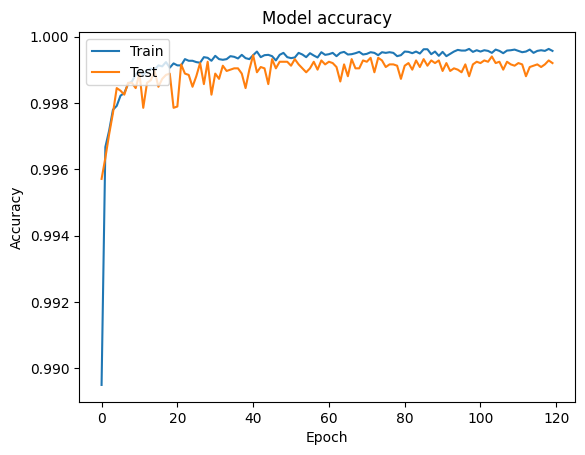

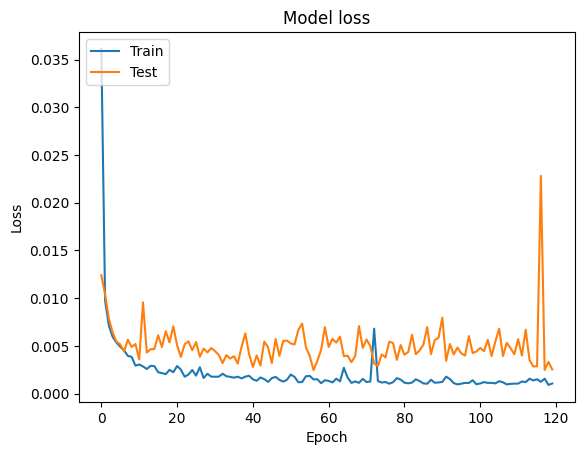

In [26]:
F_S('None',0)
Model_DNN(57,'relu','sigmoid','Adam',120,100)

##### Perform Dimentionality Reduction Using PCA

Number of features:  50
788/788 [==============================] - 1s 1ms/step
Accuracy is: 99.8809287557055
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11701
           1       1.00      1.00      1.00     13494

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

[[11690    11]
 [   19 13475]]


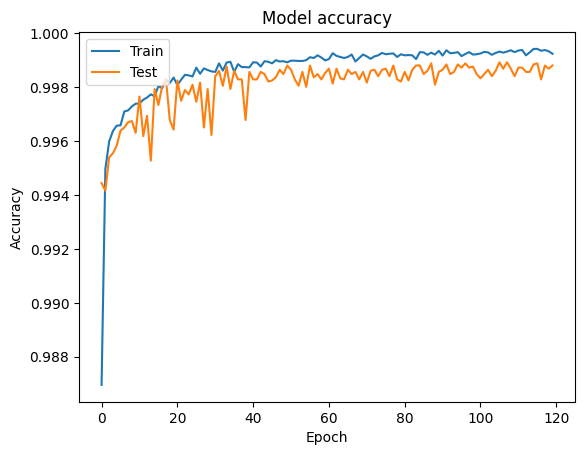

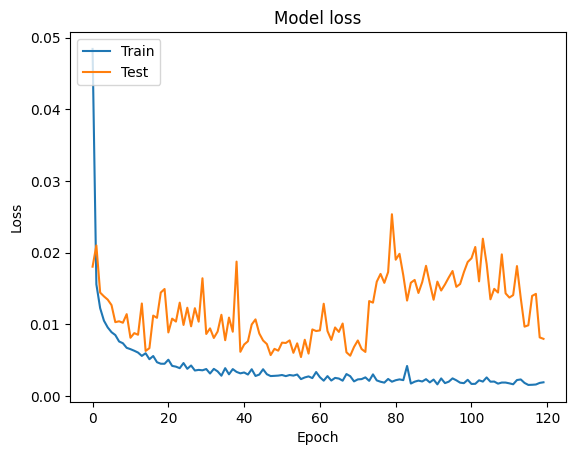

In [27]:
F_S('PCA',50)
Model_DNN(57,'relu','sigmoid','Adam',120,100)

##### Perform Features Selection using ANOVA

Number of features:  50
788/788 [==============================] - 1s 2ms/step
Accuracy is: 99.88489779718198
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11701
           1       1.00      1.00      1.00     13494

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

[[11698     3]
 [   26 13468]]


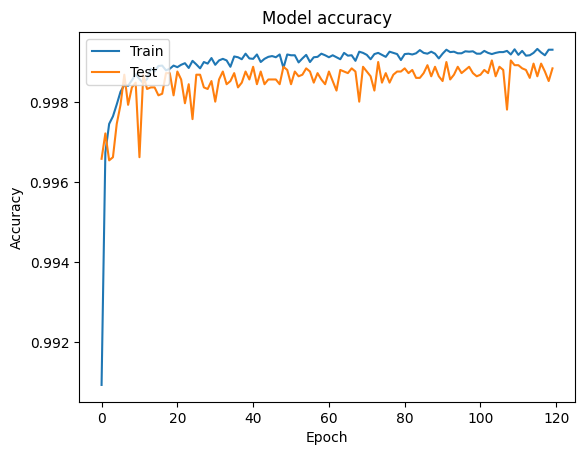

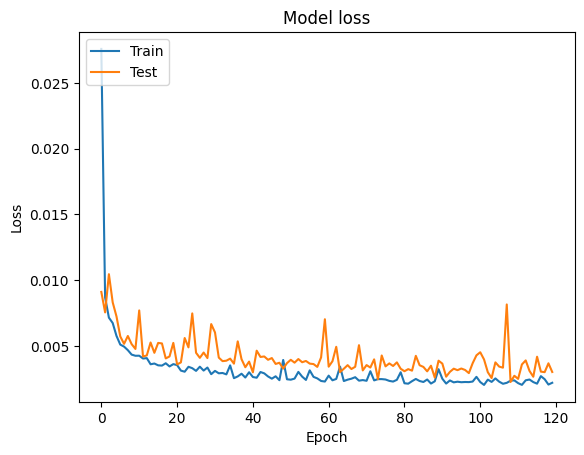

In [28]:
from sklearn.feature_selection import f_classif
F_S('Anova',50)
Model_DNN(57,'relu','sigmoid','Adam',120,100)